In [81]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Network
## 01: Single Layer



## Import Statements

In [82]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # for train-test splitting
from sklearn.metrics import accuracy_score  # for accuracy score calculation

In [83]:
# some global variables

RANDOM_STATE = 24
np.random.RandomState(seed=RANDOM_STATE)

# input and output directories
inpDir = '../../input'
outDir = '../output'

# Hyperparameters
TEST_SIZE  = 0.2 # Size of test data

In [84]:
df=pd.read_csv("breast_cancer_mod.csv")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,0.820738,0.383909,0.0,1.0,1.0,1.0,1.0
mean texture,569.0,0.880492,0.324671,0.0,1.0,1.0,1.0,1.0
mean perimeter,569.0,0.827768,0.377914,0.0,1.0,1.0,1.0,1.0
mean area,569.0,0.954306,0.209005,0.0,1.0,1.0,1.0,1.0
mean smoothness,569.0,0.811951,0.391095,0.0,1.0,1.0,1.0,1.0
mean compactness,569.0,0.910369,0.285904,0.0,1.0,1.0,1.0,1.0
mean concavity,569.0,0.917399,0.275520,0.0,1.0,1.0,1.0,1.0
mean concave points,569.0,0.899824,0.300498,0.0,1.0,1.0,1.0,1.0
mean symmetry,569.0,0.831283,0.374831,0.0,1.0,1.0,1.0,1.0
mean fractal dimension,569.0,0.927944,0.258809,0.0,1.0,1.0,1.0,1.0


In [87]:
for col in df.columns:
    print(df[col].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]


<BarContainer object of 2 artists>

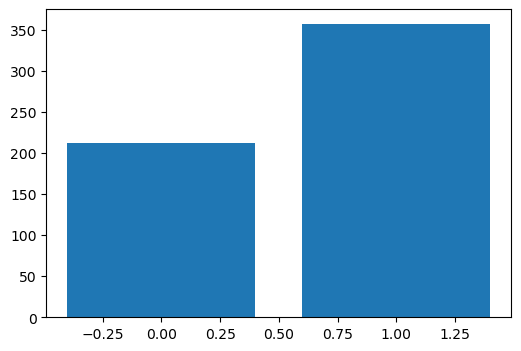

In [88]:
labels=['Malignant','Benign']
fig,ax=plt.subplots(figsize=(6,4))
ax.bar(df['target'].value_counts().index,df['target'].value_counts().values)

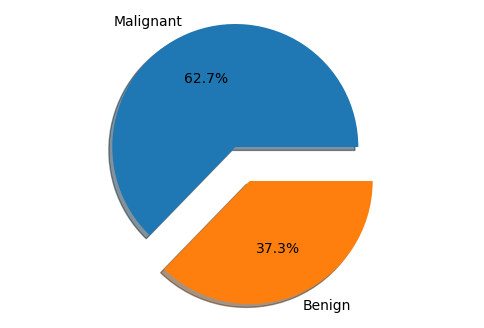

In [89]:
fig,ax=plt.subplots(figsize=(6,4))
explode=(0,0.3)
ax.pie(df['target'].value_counts(),
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',shadow=True,startangle=0)
_=ax.axis('equal')


In [90]:
ax.pie?

Signature:
ax.pie(
    x,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    *,
    normalize=True,
    hatch=None,
    data=None,
)
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.

The wedges are plotted counterclockwise, by default starting from the
x-axis.

Parameters
----------
x : 1D array-like
    The wedge sizes.

explode : array-like, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.

labels : list, default: None
    A sequence of strings providing the labels for each wedge

colors : :mpltype:`color` or list of :mpltype:`color`, default: None
    A sequence of colors through which the 

In [91]:
X=df.drop('target',axis=1)
y=df['target']
X.shape,y.shape

((569, 30), (569,))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=RANDOM_STATE,test_size=TEST_SIZE,stratify=y)

In [93]:
X_train['total']=X_train.astype(np.int16).sum(axis=1)
X_train['target']=y_train
X_train.sort_values('total',inplace=True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,15,0


In [94]:
print(X_train['total'].value_counts())

total
30    184
29     65
28     53
27     31
24     19
23     18
25     17
26     15
20     12
22     11
21      9
19      4
17      4
16      4
15      4
13      2
18      2
12      1
Name: count, dtype: int64


In [ ]:
X_test['total']=X_test.astype(np.int16).sum(axis=1)
X_test['target']=y_test
X_test.sort_values('total',inplace=True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
12,0,0,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,16,0
18,1,1,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,18,0
35,0,1,0,0,1,1,0,0,1,1,...,0,0,0,1,1,0,1,1,20,0


#Only on training data

In [102]:
accuracy={}
for b in range(X_train.shape[1]):
    X_train['pred']=X_train['total']>=b
    accuracy[b]=accuracy_score(X_train['target'],X_train['pred'])
   



best_b=max(accuracy,key=accuracy.get)
best_b
accuracy[best_b]

0.8505494505494505